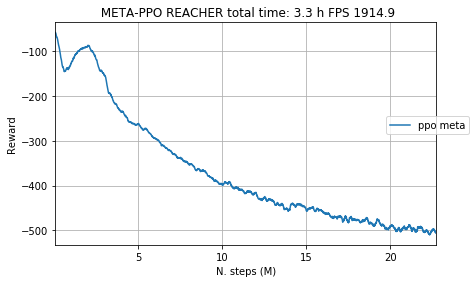

In [52]:
# from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pylab as plt
import numpy as np
import argparse
import os
import pandas as pd
from glob import glob


def get_data(my_dir):
    num_good_traj = 0
    
    exps = glob(my_dir+'*')
    d = exps[0]
    df = load_results(d)
    #df = pd.DataFrame() 

    df['f']= df['l'].cumsum()/1000000

    df['perf']= df['r']

    return df


my_dir = 'RUNS/exp_test_reacher_meta_2'
df = get_data(my_dir)



time_limit = 0
fig = plt.figure(clear=True, figsize=(15,9))


roll = 1000
total_time = df['t'].iloc[-1]
total_steps = df['l'].sum()
total_episodes = df['r'].size

ax = plt.subplot(2, 2, 1)
ax.set_title(' {} total time: {:.1f} h FPS {:.1f}'.format('META-PPO REACHER',total_time/3600, total_steps/total_time))
df[['f','r']].rolling(roll).mean().iloc[0:-1:40].plot('f','r',  ax=ax,label='ppo meta')

ax.set_xlabel('N. steps (M)')
ax.set_ylabel('Reward')
#plt.xlim((0, 20))
ax.grid(True)
#ax.legend(loc=4, prop={'size': 10})#
ax.legend(bbox_to_anchor=(1.1, 0.6))

Text(0.5, 1.0, 'total meta loss')

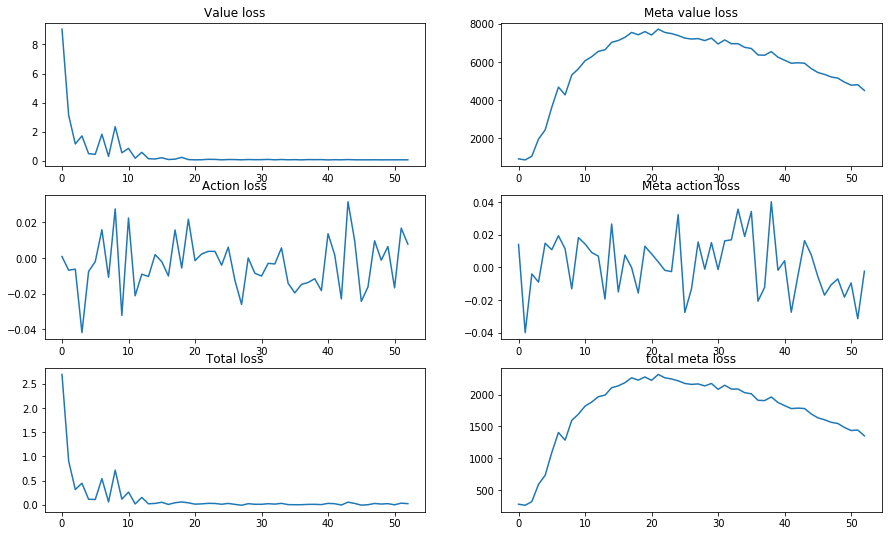

In [53]:
my_dir = 'RUNS/exp_test_ll_7/loss_monitor/loss_monitor.csv'
data = pd.read_csv(my_dir) 
fig, axs = plt.subplots(3, 2, figsize=(15,9))
axs[0, 0].plot(data['V_loss'])
axs[0, 0].set_title('Value loss')
axs[0, 1].plot(data['meta_value_loss'])
axs[0, 1].set_title('Meta value loss')
axs[1, 0].plot(data['action_loss'])
axs[1, 0].set_title('Action loss')
axs[1, 1].plot(data['meta_action_loss'])
axs[1, 1].set_title('Meta action loss')
axs[2, 0].plot(data['loss'])
axs[2, 0].set_title('Total loss')
axs[2, 1].plot(data['meta_loss'])
axs[2, 1].set_title('total meta loss')

In [50]:
data

,V_loss,action_loss,meta_action_loss,meta_value_loss,meta_loss,loss
0,9.058933,0.000730,0.014005,934.207825,280.276367,2.690709
1,3.134316,-0.006894,-0.039833,879.875732,263.922913,0.905850
2,1.154958,-0.006287,-0.004007,1072.379272,321.709808,0.313348
3,1.706949,-0.041768,-0.009000,1967.955078,590.377563,0.444173
4,0.483063,-0.007605,0.014757,2444.320801,733.311035,0.112546
5,0.441570,-0.002062,0.010769,3634.998535,1090.510376,0.108237
6,1.821224,0.015737,0.019323,4684.398438,1405.338867,0.539760
7,0.296289,-0.010883,0.011337,4281.480469,1284.455566,0.057852
8,2.349226,0.027378,-0.013120,5316.099609,1594.816895,0.713419
9,0.544797,-0.032145,0.018190,5640.382812,1692.133057,0.114350
